## Network analysis task
- The purpose is to apply knowledge gained to do network analysis using R and igraph

### Import libraries

In [1]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




### Data
- There will be 2 data files used for the first part of network analysis which consist of
    1. `dolphin_vertices.csv` - contains dolphin data with name and gender information
    2. `dolphin_edges.csv` - contains pairs of dolphins who have frequent associations with each other
    

### Load data
- Read vertex and edge data from URL into R then load dolphin data as an undirected graph into igraph

In [2]:
# data URL
edge_url <- 'https://raw.githubusercontent.com/dougmet/NetworksWorkshop/master/data/dolphin_edges.csv'
vertex_url <- 'https://raw.githubusercontent.com/dougmet/NetworksWorkshop/master/data/dolphin_vertices.csv'

# read csv files into R data frame
dolphin_vertices <- read.csv(vertex_url)
dolphin_edges <- read.csv(edge_url)

head(dolphin_vertices, n = 5)

,Name,Gender
,<chr>,<chr>
1,Beak,Male
2,Beescratch,Male
3,Bumper,Male
4,CCL,Female
5,Cross,Male


In [3]:
head(dolphin_edges, n = 5)

,From,To
,<chr>,<chr>
1,CCL,Double
2,DN16,Feather
3,DN21,Feather
4,Beak,Fish
5,Bumper,Fish


In [4]:
# load dolphin data into igraph
dolphin <- graph_from_data_frame(dolphin_edges, vertices = dolphin_vertices, directed = FALSE)
dolphin

IGRAPH a340b61 UN-- 62 159 -- 
+ attr: name (v/c), Gender (v/c)
+ edges from a340b61 (vertex names):
 [1] CCL       --Double   DN16      --Feather  DN21      --Feather 
 [4] Beak      --Fish     Bumper    --Fish     DN16      --Gallatin
 [7] DN21      --Gallatin Feather   --Gallatin Beak      --Grin    
[10] CCL       --Grin     Beak      --Haecksel Grin      --Hook    
[13] Beescratch--Jet      DN21      --Jet      Feather   --Jet     
[16] Gallatin  --Jet      Haecksel  --Jonah    Beescratch--Knit    
[19] DN63      --Knit     Double    --Kringel  Hook      --Kringel 
[22] Jonah     --Kringel  Jonah     --MN105    Jet       --MN23    
+ ... omitted several edges

### Network manipulation

- What is the number of male and female dolphins in the pod ?
- Add a `weight = 1` attribute to every edge in the dolphin network and verify that the igraph object is now a weighted network

In [5]:
V(dolphin)[V(dolphin)$Gender  == 'Male']
V(dolphin)[V(dolphin)$Gender  == 'Female']

+ 33/62 vertices, named, from a340b61:
 [1] Beak       Beescratch Bumper     Cross      DN21       DN63      
 [7] Feather    Fork       Gallatin   Haecksel   Jet        Jonah     
[13] Knit       MN105      MN23       MN60       MN83       Mus       
[19] Notch      Number1    Oscar      Patchback  PL         Quasi     
[25] SMN5       SN90       SN96       Thumper    Topless    Upbang    
[31] Web        Zig        Zipfel    

+ 25/62 vertices, named, from a340b61:
 [1] CCL      DN16     Double   Fish     Five     Grin     Hook     Kringel 
 [9] Scabs    Shmuddel SN100    SN4      SN63     SN89     SN9      Stripes 
[17] TR120    TR77     TR88     TR99     Trigger  TSN103   Vau      Wave    
[25] Whitetip

In [6]:
V(dolphin)[[!V(dolphin)$Gender %in% c('Male','Female')]]

+ 4/62 vertices, named, from a340b61:
          name  Gender
33 Ripplefluke Unknown
49        TR82 Unknown
54       TSN83 Unknown
60         Zap Unknown

**Observation**
- The most common dolphin gender is `Male` as we have `33` male dolphins. Also, there are `25` `Female` dolphins in the pod
- We could notice from the number of `Male` and `Female` dophins that there are some dolphins with other gender. Upon finding, the third gender `Unknown` with dolphin count of `4` was revealed

In [7]:
E(dolphin)$weight <- 1
dolphin

IGRAPH a340b61 UNW- 62 159 -- 
+ attr: name (v/c), Gender (v/c), weight (e/n)
+ edges from a340b61 (vertex names):
 [1] CCL       --Double   DN16      --Feather  DN21      --Feather 
 [4] Beak      --Fish     Bumper    --Fish     DN16      --Gallatin
 [7] DN21      --Gallatin Feather   --Gallatin Beak      --Grin    
[10] CCL       --Grin     Beak      --Haecksel Grin      --Hook    
[13] Beescratch--Jet      DN21      --Jet      Feather   --Jet     
[16] Gallatin  --Jet      Haecksel  --Jonah    Beescratch--Knit    
[19] DN63      --Knit     Double    --Kringel  Hook      --Kringel 
[22] Jonah     --Kringel  Jonah     --MN105    Jet       --MN23    
+ ... omitted several edges

**Observation**
- after assigning `weight = 1` attribute to all edges and printing the dolphin network, `UNW-` on the top most line can be observed which indicates that dolphin is an `undirected` `(U)`, `named` `(N)` and `weighted` `(W)` network 

### Network visualization
- Create visualization of the dolphin network and make it readable
- Mark associations between dolphins as either of the same gender or different genders
- Create a dolphin network in which each dolphin had at least once associated with other gender and visualize the results

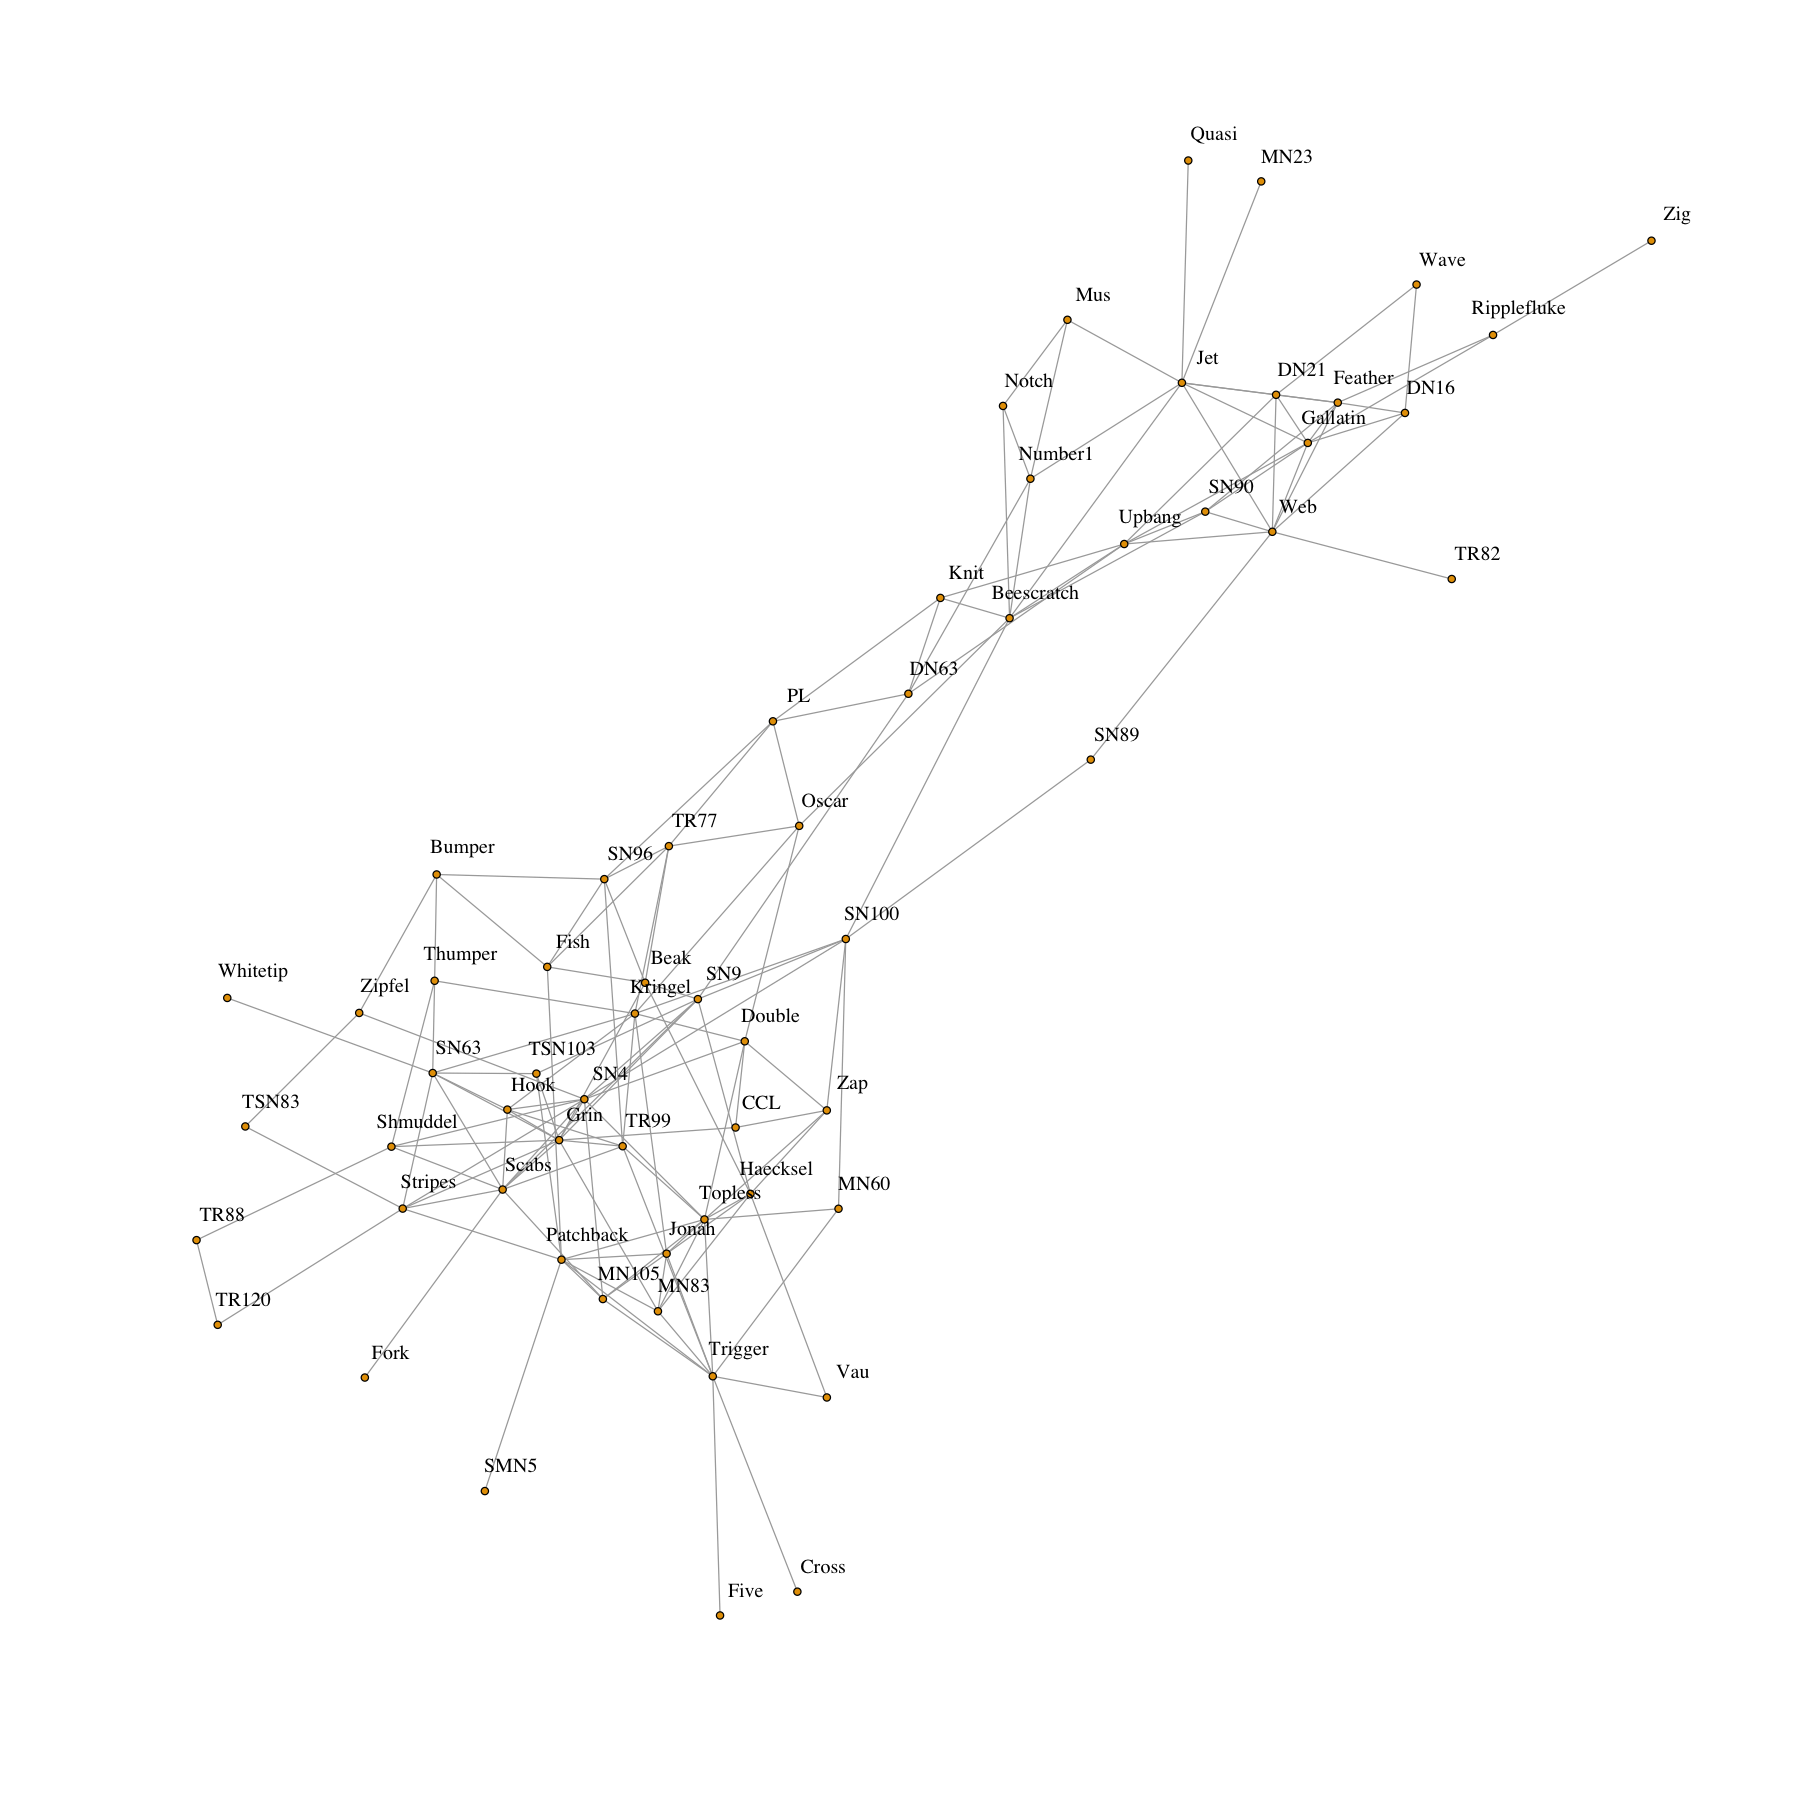

In [71]:
options(repr.plot.width = 15, repr.plot.height = 15)
plot(dolphin, layout = layout_with_fr(dolphin), vertex.size = 1, vertex.label.dist = 0.7, vertex.label.color="black")

In [72]:
simple_dolphin <- simplify(dolphin) # remove duplicate associations

# filter out dolphins whose gender we are unsure about
simple_dolphin <- simple_dolphin - V(simple_dolphin)[V(simple_dolphin)$Gender == 'Unknown']

# extract gender from each edge endpoints
head_g <- head_of(simple_dolphin, E(simple_dolphin))$Gender
tail_g <- tail_of(simple_dolphin, E(simple_dolphin))$Gender

# create new flag telling whether association is of different gender
E(simple_dolphin)$IsDifferentGender <- head_g != tail_g

In [73]:
# verify if the implementation is correct
E(simple_dolphin)[[1:5]]
V(simple_dolphin)[[V(simple_dolphin)$name %in% c('Beak', 'Fish', 'Haecksel')]]

+ 5/148 edges from 6493c88 (vertex names):
  tail     head tid hid weight IsDifferentGender
1 Beak     Fish   1  11      1              TRUE
2 Beak     Grin   1  15      1              TRUE
3 Beak Haecksel   1  16      1             FALSE
4 Beak      SN9   1  40      1              TRUE
5 Beak     SN96   1  42      1             FALSE

+ 3/58 vertices, named, from 6493c88:
       name Gender
1      Beak   Male
11     Fish Female
16 Haecksel   Male

In [79]:
head_diff <- head_of(simple_dolphin, E(simple_dolphin)[E(simple_dolphin)$IsDifferentGender])
tail_diff <- tail_of(simple_dolphin, E(simple_dolphin)[E(simple_dolphin)$IsDifferentGender])

filter_cond <- V(simple_dolphin) %in% unique(head_diff) | V(simple_dolphin) %in% unique(tail_diff)
diff_gender_network <- induced_subgraph(simple_dolphin, V(simple_dolphin)[filter_cond])

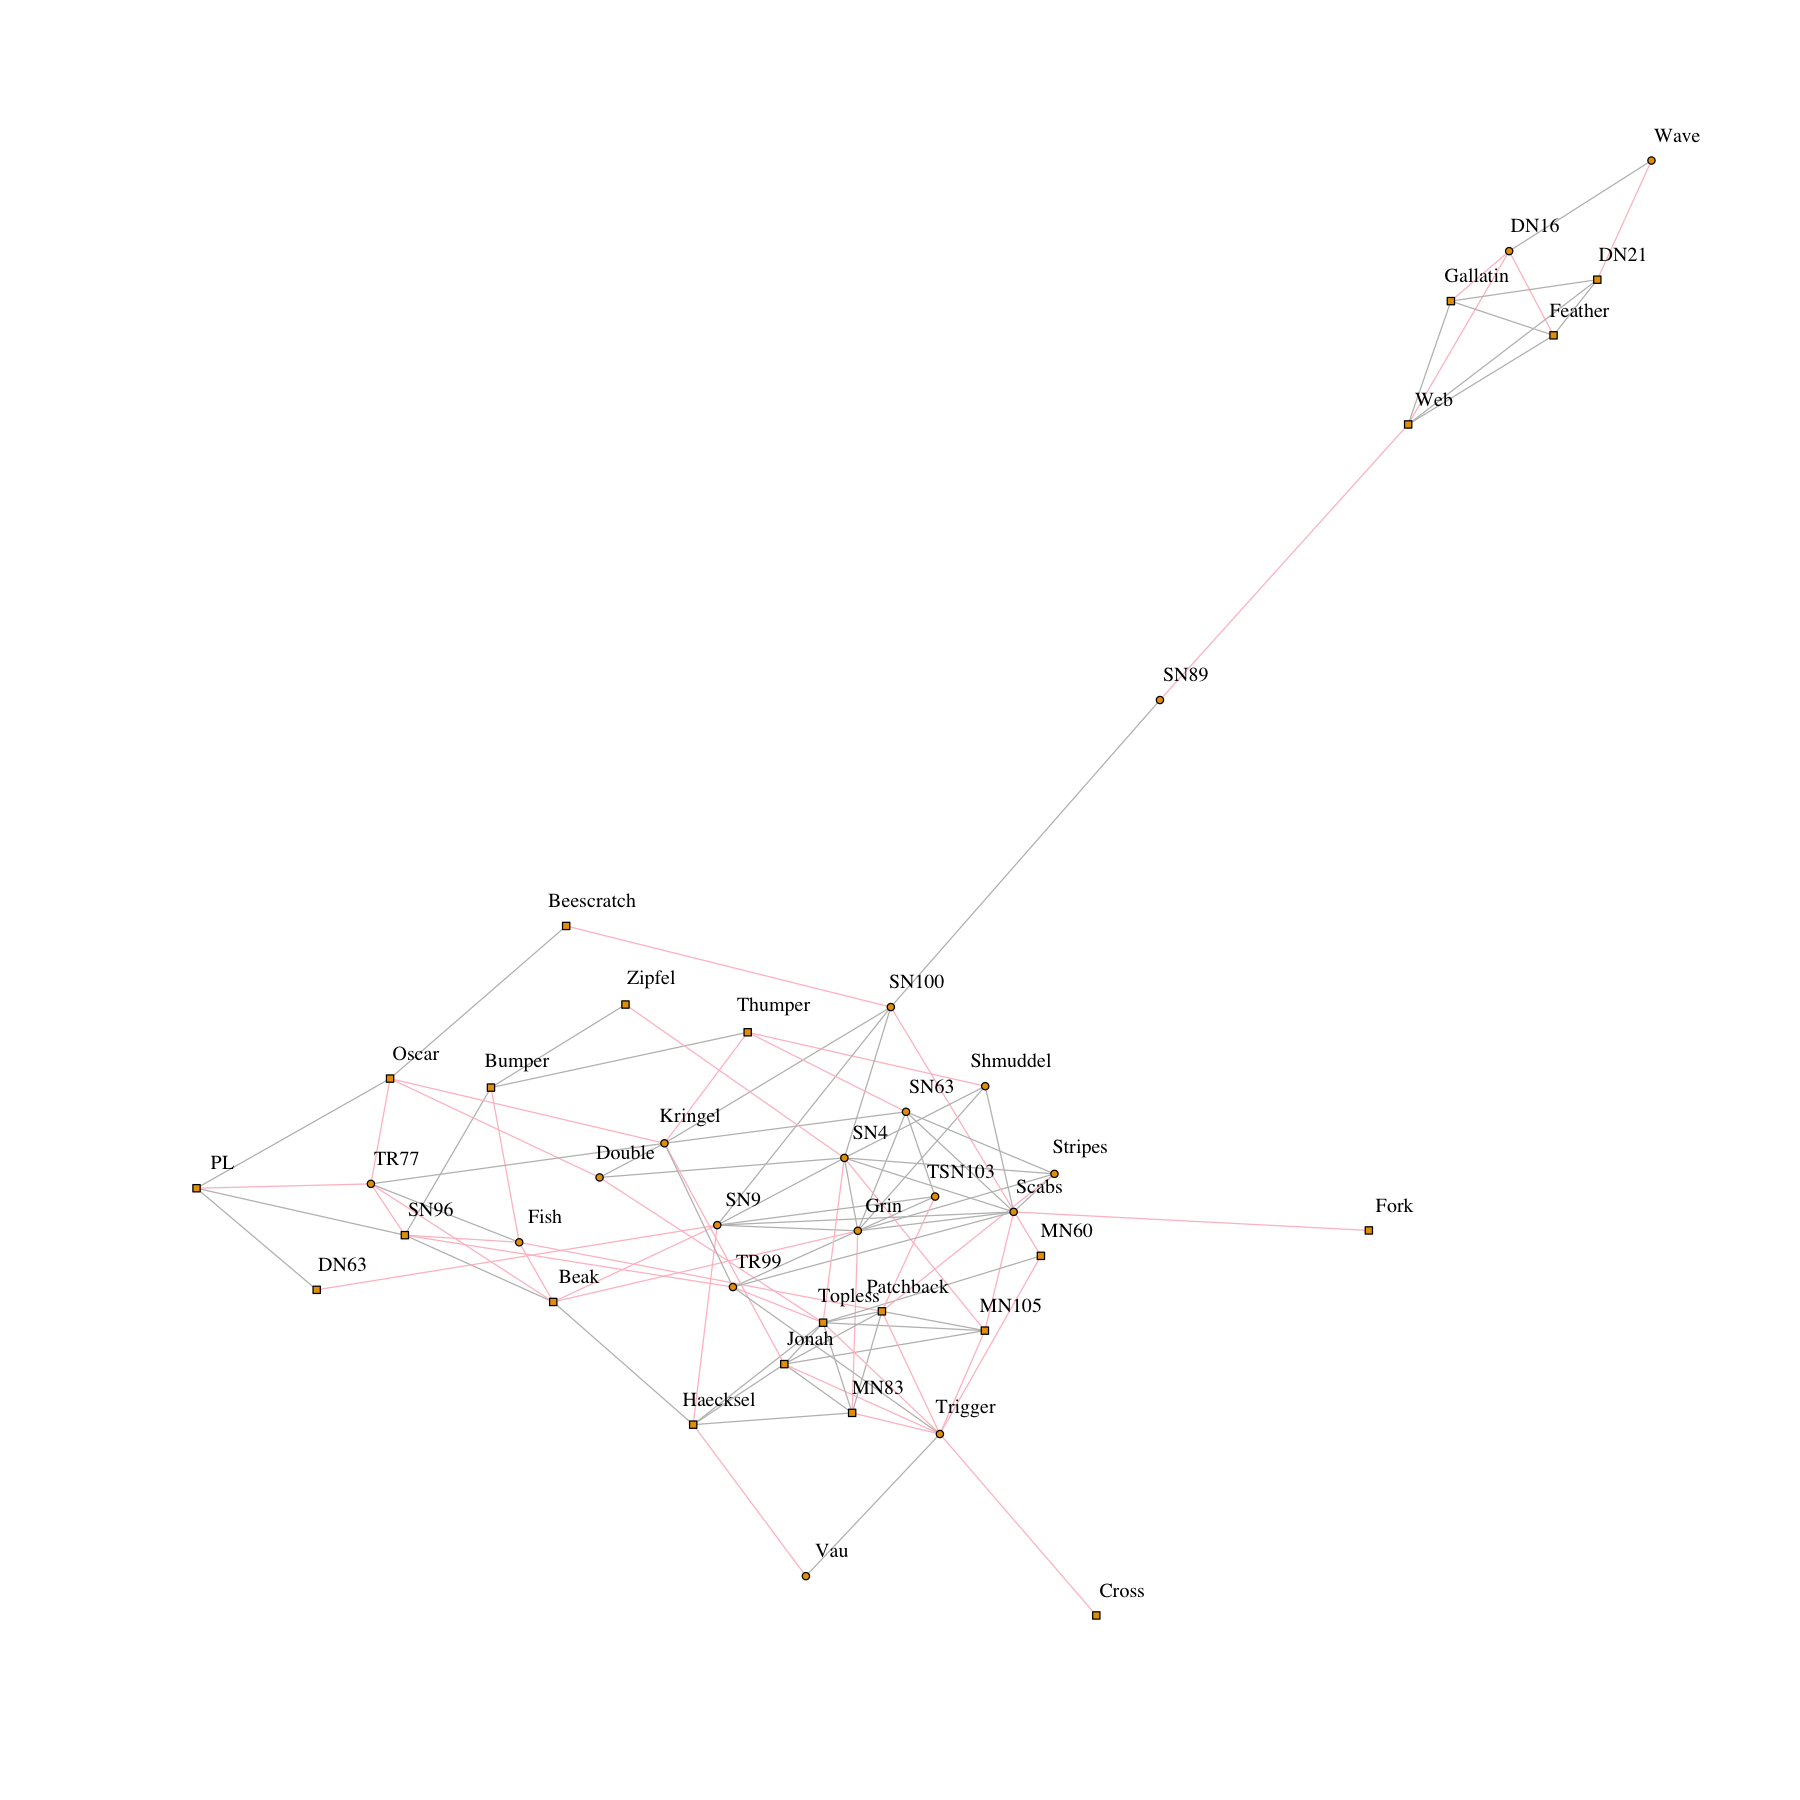

In [94]:
# styling
E(diff_gender_network)$color = 'grey'
E(diff_gender_network)[E(diff_gender_network)$IsDifferentGender]$color = 'pink'

V(diff_gender_network)$shape = 'circle'
V(diff_gender_network)[V(diff_gender_network)$Gender == 'Male']$shape = 'square'

plot(diff_gender_network, vertex.size = 1, vertex.label.dist = 0.7, vertex.label.color="black")

### Structural measures
- Find top 3 vertices with the highest degree
- Find the vertex with the highest local clustering coefficient
- What is the distribution of geodesic path lengths between each pair of dolphins ?

In [9]:
degrees <- degree(dolphin)
head(sort(degrees, decreasing = T), n = 3)

Grin     SN4 Topless 
     12      11      11

In [10]:
lc <- transitivity(dolphin, type = 'local')
max_lc <- max(lc, na.rm = T)

max_lc
V(dolphin)[[match(max_lc, lc)]]

[1] 0.6666667

+ 1/62 vertex, named, from 790386c:
   name Gender
26  Mus   Male

**Observation**
- `Grin` has associated with largest no. of dolphins as `Grin` has the largest degree of `12`. `SN4` and `Topless` are the dolphins who have second largest no. of connections `(11)`
- `66 percent` of `Mus's` connections know each other making `Mus` the dolphin with `largest` `local transitivity` or local clustering coefficient

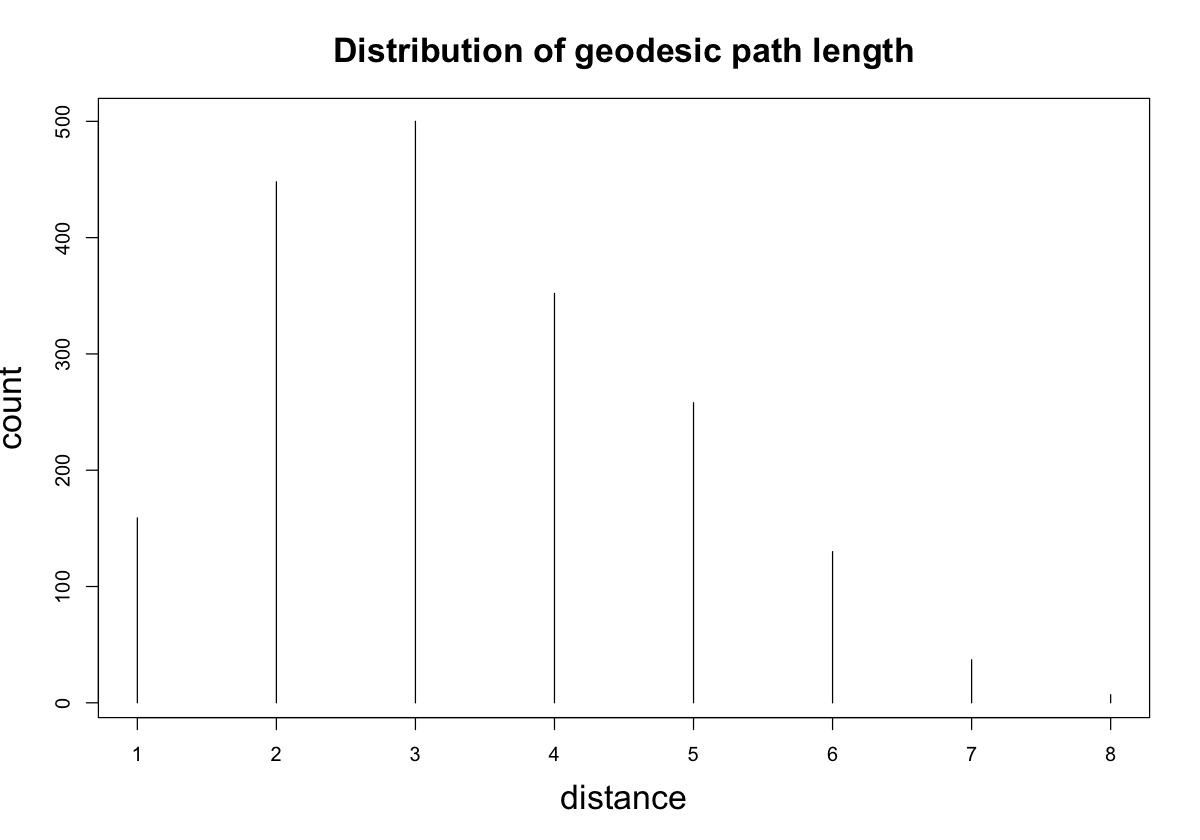

In [23]:
options(repr.plot.width = 10, repr.plot.height = 7)
dt <- distance_table(dolphin, directed = F)$res
plot(
    dt, type = 'h',
    xlab = 'distance', ylab = 'count', main = 'Distribution of geodesic path length', 
    cex.lab = 1.7, cex.main = 1.7
)

**Observation**
- The distribution of shortest path length between dolphins is left skewed and most prevalently dolphins have associated via their direct connections
- By looking at the counts, it was found that around 58.5 percent of dolphin pairs have indirect associations with each other through at most 2 dolphins